# GPUDirect RDMA tests

Results from GPUDirect RDMA latency and bandwidth tests.

In [1]:
import os, sys
from pprint import pprint
from pathlib import Path

REPO_ROOT = str(Path(os.getcwd()).parent.parent.parent.parent)  # Repo root dir
REFRAME_ROOT = os.path.join(REPO_ROOT, 'reframe')  # ReFrame root dir
REFRAME_DEPS = os.path.join(REFRAME_ROOT, 'external')  # ReFrame dependencies
REPO_DEPS = os.path.join(REPO_ROOT, 'external')  # Repo dependencies
PERFLOG_DIR = os.path.join(REPO_ROOT, 'perflogs')  # Perflogs dir
sys.path.extend((REFRAME_ROOT, REPO_ROOT, REPO_DEPS, REFRAME_DEPS)) # the `modules` package imports `reframe` so need that in sys.modules

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import modules
from reframe_config import site_configuration

# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
from IPython.display import display, HTML

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
# Constants and conversions
B2KiB = 1024
Gb2MB = 125

## Systems and their descriptions

The following table gives a high level overview of each partition defined in terms of architecture and configuration. The column `S:C:T` stands for **number of sockets**, **number of physical cores per socket** and **number of threads per core**. Similarly, the column `caches` indicate the cache sizes from lower to higher in bytes.

In [4]:
df = modules.utils.tabulate_partitions(root=PERFLOG_DIR)
display(HTML(df.transpose().to_html()))

## Benchmarks

OSU micro benchmarks suite is used to measure latency and bandwidth of RDMA enabled GPU devices. By default following benchmarks are executed:

- osu_bw
- osu_bibw
- osu_latency

Each benchmark except Pingpong is executed in four different cases:

- GPUDirect RDMA enabled and GDR Copy enabled
- GPUDirect RDMA enabled and GDR Copy disabled
- GPUDirect RDMA disabled and GDR Copy enabled
- GPUDirect RDMA disabled and GDR Copy disabled

Finally, three different communication patterns are implemented:

- Device to Device
- Host to Device
- Device to Host

All the tests are executed on 2 nodes with one process per node. An end-to-end connected HCA to GPUs must be chosen to perform the test and MPI processes are mapped to core that is close to this adapater.

## Maximum bandwidths for uni and bi bandwidth benchmarks

The table shows the maximum bandwidths obtained amongst all message sizes for Uni and Bi bandwidth benchmarks. For the values shown in the following table, we use benchmark tests from only 2 nodes.

In [5]:
max_bw_cases = {}
for test_name, test in [('Uniband [MB/s]', 'GpuDirectRdmaTest_bw_'), 
                        ('Biband [MB/s]', 'GpuDirectRdmaTest_bibw_')]:
    for comm_type in ['D_D', 'D_H', 'H_D']:
        for case in ['RDMA_GDR_Copy_Enabled', 'RDMA_Enabled_GDR_Copy_Disabled',
                 'RDMA_Disabled_GDR_Copy_Enabled', 'RDMA_GDR_Copy_Disabled']:
            df = modules.utils.tabulate_last_perf(test=test + comm_type,
                                                  root=PERFLOG_DIR,
                                                  extras=[])
            df = df.filter(regex=(case), axis=0)
            for c in df.columns:
                max_bw = df.max(axis=0).values[0]
                if c not in max_bw_cases.keys():
                    max_bw_cases[c] = {}
                if (test_name, case) not in max_bw_cases[c].keys():
                    max_bw_cases[c][(comm_type, test_name, case)] = {}
                max_bw_cases[c][(comm_type, test_name, case)] = max_bw
result = pd.DataFrame.from_dict(max_bw_cases, orient='columns')
result.index = pd.MultiIndex.from_tuples(result.index)
display(pd.DataFrame(max_bw_cases))

cscs-daint:daint-icc21-impi21-ib-umod-gpu:gpu-direct-rdma  \
D_D Uniband [MB/s] RDMA_GDR_Copy_Enabled                                                         0.0           
                   RDMA_Enabled_GDR_Copy_Disabled                                                0.0           
                   RDMA_Disabled_GDR_Copy_Enabled                                                0.0           
                   RDMA_GDR_Copy_Disabled                                                        0.0           
D_H Uniband [MB/s] RDMA_GDR_Copy_Enabled                                                         0.0           
                   RDMA_Enabled_GDR_Copy_Disabled                                                0.0           
                   RDMA_Disabled_GDR_Copy_Enabled                                                0.0           
                   RDMA_GDR_Copy_Disabled                                                        0.0           
H_D Uniband [MB/s] RDMA_GDR_Copy_Enabled                                                         0.0           
                   RDMA_Enabled_GDR_Copy_Disabled                                                0.0           
                   RDMA_Disabled_GDR_Copy_Enabled                                                0.0           
                   RDMA_GDR_Copy_Disabled                                                        0.0           
D_D Biband [MB/s]  RDMA_GDR_Copy_Enabled                                                         0.0           
                   RDMA_Enabled_GDR_Copy_Disabled                                                0.0           
                   RDMA_Disabled_GDR_Copy_Enabled                                                0.0           
                   RDMA_GDR_Copy_Disabled                                                        0.0           
D_H Biband [MB/s]  RDMA_GDR_Copy_Enabled                                                         0.0           
                   RDMA_Enabled_GDR_Copy_Disabled                                                0.0           
                   RDMA_Disabled_GDR_Copy_Enabled                                                0.0           
                   RDMA_GDR_Copy_Disabled                                                        0.0           
H_D Biband [MB/s]  RDMA_GDR_Copy_Enabled                                                         0.0           
                   RDMA_Enabled_GDR_Copy_Disabled                                                0.0           
                   RDMA_Disabled_GDR_Copy_Enabled                                                0.0           
                   RDMA_GDR_Copy_Disabled                                                        0.0           

                                                   juwels-booster:booster-gcc9-ompi4-ib-umod-nvgpu:gpu-direct-rdma  
D_D Uniband [MB/s] RDMA_GDR_Copy_Enabled                                                         0.0                
                   RDMA_Enabled_GDR_Copy_Disabled                                                0.0                
                   RDMA_Disabled_GDR_Copy_Enabled                                                0.0                
                   RDMA_GDR_Copy_Disabled                                                        0.0                
D_H Uniband [MB/s] RDMA_GDR_Copy_Enabled                                                         0.0                
                   RDMA_Enabled_GDR_Copy_Disabled                                                0.0                
                   RDMA_Disabled_GDR_Copy_Enabled                                                0.0                
                   RDMA_GDR_Copy_Disabled                                                        0.0                
H_D Uniband [MB/s] RDMA_GDR_Copy_Enabled                                                         0.0                
                   RDMA_Enabled_GDR_Copy_Disabled                               

## Results of latency, uniband and biband

The plots show the following results:

- Latency with message size
- Bandwidth of Uniband and Biband tests with message size

Results are for the most-recent test on each system/partition/environment combination.

In [6]:
def plot_results(comm_type):
    for (test_name, test, unit) in [('Uniband', 'GpuDirectRdmaTest_bw', ' MB/s'),
                                    ('Biband', 'GpuDirectRdmaTest_bibw', ' MB/s'),
                                    ('Latency', 'GpuDirectRdmaTest_latency', ' us'),]:
        perf_records = modules.utils.load_perf_logs(root=PERFLOG_DIR, extras=[], test=test + comm_type, last=True)
        if perf_records is None:
            print('%s: no performance logs found' % test + comm_type)
        nsystems = perf_records.groupby(['sysname', 'partition', 'environ']).ngroups
        fig, axes = plt.subplots(nrows=1, ncols=nsystems, sharey=True)
        if nsystems == 1:
            axes = [axes]
        for iplot, (spe, data) in enumerate(perf_records.groupby(['sysname', 'partition', 'environ'])):
            for case in ['_RDMA_GDR_Copy_Enabled', '_RDMA_Enabled_GDR_Copy_Disabled',
                         '_RDMA_Disabled_GDR_Copy_Enabled', '_RDMA_GDR_Copy_Disabled']:
                data_case = data.loc[data.perf_var.str.contains(case), :]
                data_case['#bytes'] = data_case.perf_var.apply(lambda x: int(x.replace(case, '')) / B2KiB)
                data_case.plot(ax=axes[iplot], x='#bytes', y='perf_value', style=['o-'], label=f' {case}')

        for iax, ax in enumerate(axes):
            ax.set_title('-'.join(spe[:2]))
            ax.set_xticks(data_case['#bytes'])
            ax.set_xticklabels(data_case['#bytes'])
            ax.set_xlabel('# KiB')
            ax.set_ylabel(test_name + comm_type + unit)
            ax.set_xscale('log', base=2)
            if test_name == 'Latency':
                ax.set_yscale('log', base=10)
            ax.xaxis.set_major_formatter(ScalarFormatter())
            handles, labels = ax.get_legend_handles_labels()
            ax.grid(True, which='both')
            ax.legend()

### Device to Device results
The following plots show results for the benchmarks where communication is from GPU to GPU

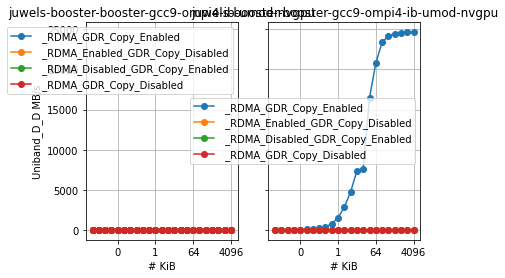

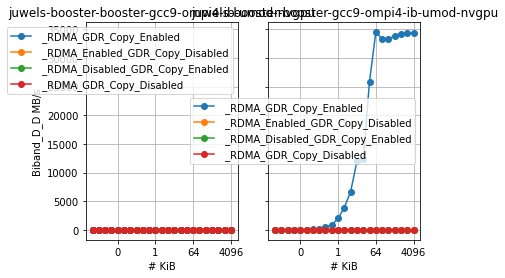

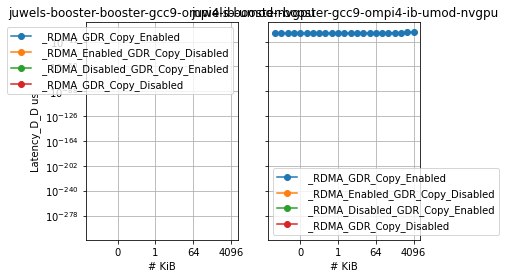

In [7]:
plot_results(comm_type = '_D_D')

### Device to Host results
The following plots show results for the benchmarks where communication is from GPU to Host

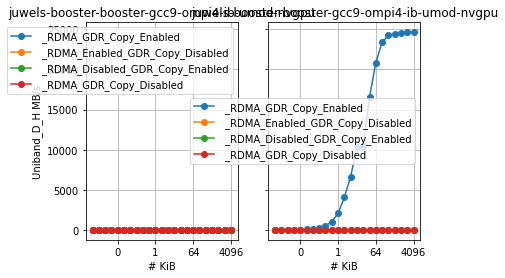

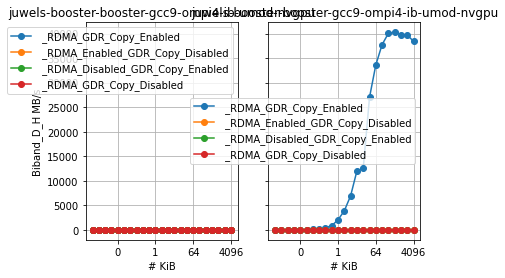

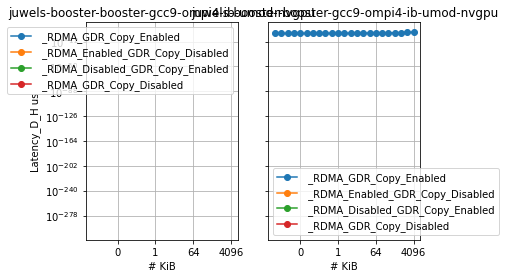

In [8]:
plot_results(comm_type = '_D_H')

### Host to Device results
The following plots show results for the benchmarks where communication is from Host to GPU

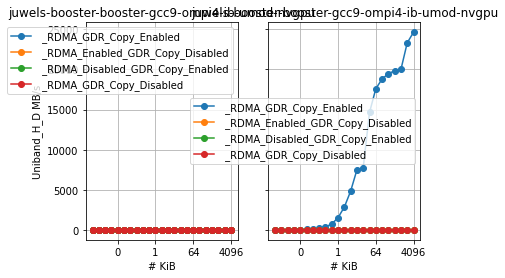

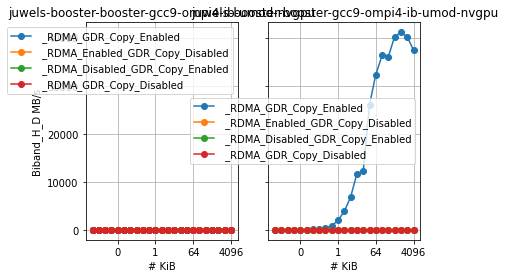

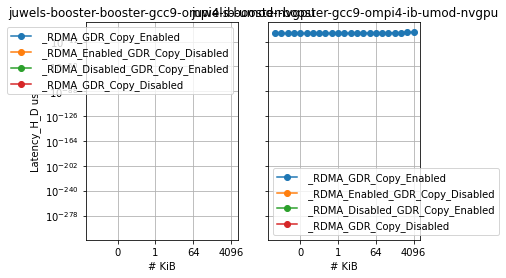

In [9]:
plot_results(comm_type = '_H_D')